# 1. Optimizacion de la funcion convexa $f(x) = x^*2*$

f_history  tensor([9.0000e+00, 5.7600e+00, 3.6864e+00, 2.3593e+00, 1.5099e+00, 9.6637e-01,
        6.1848e-01, 3.9582e-01, 2.5333e-01, 1.6213e-01, 1.0376e-01, 6.6408e-02,
        4.2501e-02, 2.7201e-02, 1.7409e-02, 1.1141e-02, 7.1305e-03, 4.5635e-03,
        2.9207e-03, 1.8692e-03, 1.1963e-03, 7.6564e-04, 4.9001e-04, 3.1360e-04,
        2.0071e-04])
x_history  tensor([-3.0000, -2.4000, -1.9200, -1.5360, -1.2288, -0.9830, -0.7864, -0.6291,
        -0.5033, -0.4027, -0.3221, -0.2577, -0.2062, -0.1649, -0.1319, -0.1056,
        -0.0844, -0.0676, -0.0540, -0.0432, -0.0346, -0.0277, -0.0221, -0.0177,
        -0.0142])


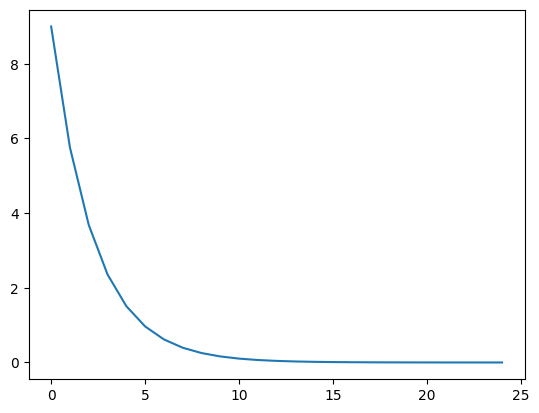

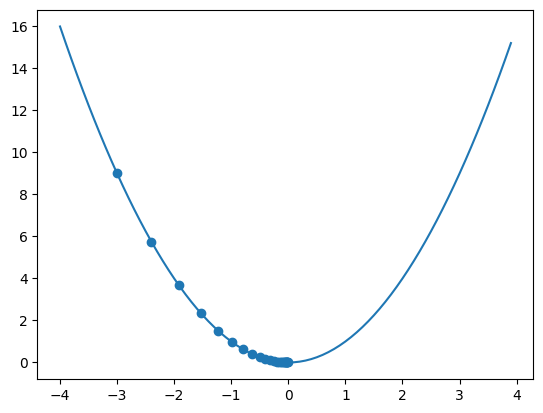

In [1]:
import torch
import matplotlib.pyplot as plt


def f(x):
  """
  Evaluacion de la funcion f(x) = x^2
  param x: tensor de entrada
  return: tensor de salida
  """
  return x ** 2

def df_dx(x):
  """
  Evaluacion de la derivada de la funcion f(x) = x^2
  param x: tensor de entrada
  return: tensor de salida
  """
  return 2 * x

def run_gradient_descent(f, df_dx, T = 15, alpha = 0.1):
  """"
  Ejecucion del algoritmo del descenso del gradiente
  param f: funcion a minimizar
  param df_dx: derivada de la funcion a minimizar
  param T: numero de iteraciones
  param alpha: tasa de aprendizaje
  return: historial de f y x
  """
  #Paso 1: Inicializacion aleatoria de la solucion candidata
  x_t = torch.tensor(-3)
  #tensor que guarda el historial de los puntos f(x) visitados en la funcion
  f_history = torch.zeros(T)
  #tensor que guarda el historial de los puntos x visitados
  x_history = torch.zeros(T)

  #Paso 2: Actualizacion de la solucion candidata T veces
  for t in range(T):
    #Paso 2.1: Evaluacion de la funcion en el punto actual
    y_t = f(x_t)
    f_history[t] = y_t
    x_history[t] = x_t
    #Paso 2.2: Evaluacion de la derivada en el punto actual
    delta_x = df_dx(x_t)
    #Paso 2.3: Actualizamos la solucion candidata
    x_t = x_t - alpha * delta_x

  return x_history, f_history

x_history, f_history = run_gradient_descent(f, df_dx, T = 25, alpha = 0.1)
print("f_history ", f_history)
print("x_history ", x_history)

plt.plot(f_history.numpy(), label = "f(x)")
plt.show()

x = torch.arange(-4, 4, 0.1)
plt.plot(x.numpy(), f(x).numpy(), label = "f(x)")
plt.scatter(x_history.numpy(), f_history.numpy(), label = "f(x)")
plt.show()



# Optimizacion de funcion no convexa

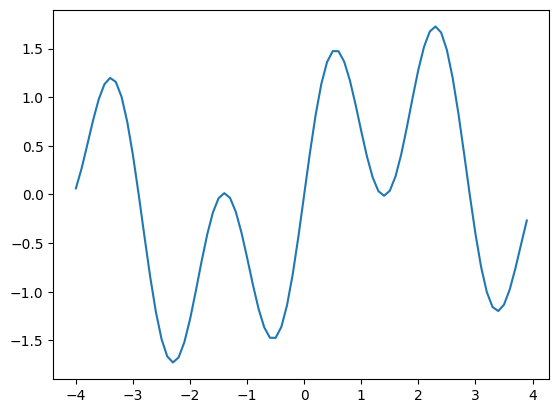

In [2]:
def f(x):
  return torch.sin(x) + torch.sin((10.0 / 3.0) * x)

x = torch.arange(-4, 4, 0.1)
y = f(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

#x inicial debe ser -3.4

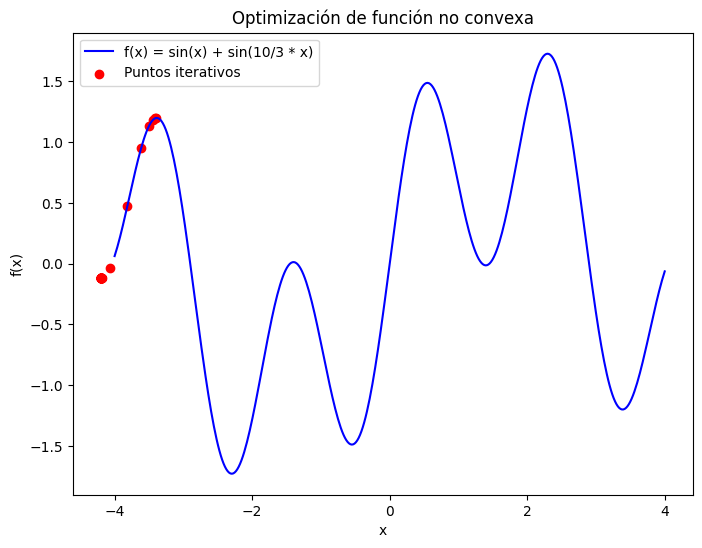

Puntos x visitados:  tensor([-3.4000, -3.4138, -3.4422, -3.5002, -3.6141, -3.8144, -4.0658, -4.1895,
        -4.1967, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966,
        -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966,
        -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966,
        -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966,
        -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966, -4.1966,
        -4.1966, -4.1966])
Valores de f(x) en cada punto:  tensor([ 1.1990,  1.1961,  1.1838,  1.1337,  0.9515,  0.4755, -0.0359, -0.1188,
        -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191,
        -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191,
        -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191,
        -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191, -0.1191,
        -0.1191, -0.1191, -0.1191, -0.11

In [8]:
import torch
import matplotlib.pyplot as plt

# Definimos la nueva función f(x)
def f(x):
    return torch.sin(x) + torch.sin((10.0 / 3.0) * x)

# Derivada de la función f(x) = sin(x) + sin(10/3 * x)
def df_dx(x):
    return torch.cos(x) + torch.cos((10.0 / 3.0) * x) * (10.0 / 3.0)

def run_gradient_descent(f, df_dx, T=50, alpha=0.1):
    """
    Ejecuta el algoritmo de descenso de gradiente en una función no convexa.
    """
    # Inicialización de la solución candidata (punto de inicio x = -3.4)
    x_t = torch.tensor(-3.4, requires_grad=False)  # valor inicial
    f_history = torch.zeros(T)
    x_history = torch.zeros(T)

    for t in range(T):
        # Evaluación de la función en el punto actual
        y_t = f(x_t)
        f_history[t] = y_t
        x_history[t] = x_t

        # Evaluación de la derivada en el punto actual
        delta_x = df_dx(x_t)

        # Actualización de la solución candidata
        x_t = x_t - alpha * delta_x  # paso del descenso de gradiente

    return x_history, f_history

# Ejecutar el descenso de gradiente
x_history, f_history = run_gradient_descent(f, df_dx, T=50, alpha=0.1)

# Visualizar el comportamiento de la función y el progreso de la optimización
x_vals = torch.linspace(-4, 4, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals.numpy(), y_vals.numpy(), label="f(x) = sin(x) + sin(10/3 * x)", color='blue')
plt.scatter(x_history.numpy(), f_history.numpy(), color='red', label="Puntos iterativos")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimización de función no convexa')
plt.legend()
plt.show()

# Imprimir los resultados finales
print("Puntos x visitados: ", x_history)
print("Valores de f(x) en cada punto: ", f_history)
